In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

df_article = pd.read_csv('CVS/shared_articles.csv')
df_user = pd.read_csv('CVS/users_interactions.csv')
df_article.head()


,timestamp,eventType,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,CONTENT SHARED,-6151852268067518688,3891637997717104548,-1457532940883382585,NaN,NaN,NaN,HTML,https://cloudplatform.googleblog.com/2016/03/G...,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,CONTENT SHARED,2448026894306402386,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,https://bitcoinmagazine.com/articles/ibm-wants...,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [2]:
df_user.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [3]:
df_triple = pd.merge(df_article, df_user, on='contentId', how='inner')
df_triple.head()

,timestamp_x,eventType_x,contentId,authorPersonId,authorSessionId,authorUserAgent,authorRegion,authorCountry,contentType,url,title,text,lang,timestamp_y,eventType_y,personId,sessionId,userAgent,userRegion,userCountry
0,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192561,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
1,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459192667,VIEW,4340306774493623681,8940341205206233829,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,SP,BR
2,1459192779,CONTENT REMOVED,-6451309518266745024,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459164960,VIEW,-1578287561410088674,2811329017818501696,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,SP,BR
3,1459193988,CONTENT SHARED,-4110354420726924665,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://www.nytimes.com/2016/03/28/business/dea...,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en,1459270471,VIEW,2873028073541627603,-3228450896145227905,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,SP,BR
4,1459194146,CONTENT SHARED,-7292285110016212249,4340306774493623681,8940341205206233829,NaN,NaN,NaN,HTML,http://cointelegraph.com/news/bitcoin-future-w...,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en,1459539433,VIEW,8414731042150985013,4543899740167763020,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


<Axes: xlabel='eventType_y', ylabel='Count'>

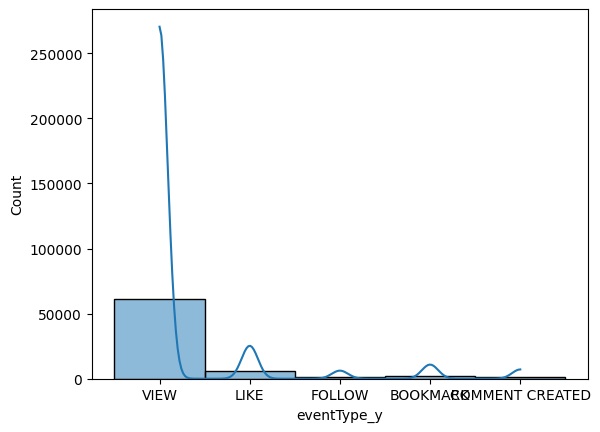

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df_triple, x='eventType_y', kde=True)

In [5]:
n_posts = len(df_triple)
n_type = len(df_triple['eventType_y'].unique())
n_users = len(df_triple['authorPersonId'].unique())

print(f"Number of posts: {n_posts}")
print(f"Number of unique types: {n_type}")
print(f"Number of unique users: {n_users}")
print(f"Average post interaction per user: {round(n_posts/n_users, 2)}")
print(f"Average posts per type: {round(n_posts/n_type, 2)}")

Number of posts: 72680
Number of unique types: 5
Number of unique users: 252
Average post interaction per user: 288.41
Average posts per type: 14536.0


In [6]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle

# Load the dataset
file_path = 'CVS/users_interactions.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Map event types to numeric ratings
event_type_mapping = {
    "VIEW": 1,
    "LIKE": 2,
    "FOLLOW": 3,
    "BOOKMARK": 4,
    "COMMENT CREATED": 5
}
df['rating'] = df['eventType'].map(event_type_mapping)

# Create a user-item interaction matrix
interaction_matrix = df.pivot_table(index='personId', columns='contentId', values='rating', fill_value=0)

# Fit the NearestNeighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(interaction_matrix)

# Save the trained model and interaction matrix
model_file = './CVS/recommender_model.sav'
with open(model_file, 'wb') as f:
    pickle.dump({'model': model, 'interaction_matrix': interaction_matrix}, f)

print(f"Model saved to {model_file}")

Model saved to ./CVS/recommender_model.sav


In [7]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
import pickle

# Load the dataset
file_path = 'CVS/users_interactions.csv'  # Update with your actual file path
df = pd.read_csv(file_path)

# Map event types to numeric ratings
event_type_mapping = {
    "VIEW": 1,
    "LIKE": 2,
    "FOLLOW": 3,
    "BOOKMARK": 4,
    "COMMENT CREATED": 5
}
df['rating'] = df['eventType'].map(event_type_mapping)

# Create a user-item interaction matrix
interaction_matrix = df.pivot_table(index='personId', columns='contentId', values='rating', fill_value=0)
print(f"Interaction matrix created with shape: {interaction_matrix.shape}")

# Fit the NearestNeighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(interaction_matrix)
print("NearestNeighbors model trained successfully.")

# Save the trained model and interaction matrix
model_file = './CVS/recommender_model.sav'
with open(model_file, 'wb') as f:
    pickle.dump({'model': model, 'interaction_matrix': interaction_matrix}, f)

print(f"Model and interaction matrix saved to {model_file}")

Interaction matrix created with shape: (1895, 2987)
NearestNeighbors model trained successfully.
Model and interaction matrix saved to ./CVS/recommender_model.sav


In [8]:
import numpy as np

# Load the saved model and interaction matrix
model_file = './CVS/recommender_model.sav'
with open(model_file, 'rb') as f:
    saved_data = pickle.load(f)

model = saved_data['model']
interaction_matrix = saved_data['interaction_matrix']

# Select a sample user (e.g., the first user in the interaction matrix)
sample_user_index = 0  # Change this to test with different users
sample_user_vector = interaction_matrix.iloc[sample_user_index].values.reshape(1, -1)

# Find the 5 nearest neighbors (most similar users)
distances, indices = model.kneighbors(sample_user_vector, n_neighbors=5)

# Print the results
print(f"Sample user index: {sample_user_index}")
print("Nearest neighbors (user indices):", indices.flatten())
print("Distances to nearest neighbors:", distances.flatten())

# Optionally, map the indices back to user IDs
user_ids = interaction_matrix.index
nearest_user_ids = user_ids[indices.flatten()]
print("Nearest neighbors (user IDs):", nearest_user_ids.tolist())

Sample user index: 0
Nearest neighbors (user indices): [   0  708 1071  307 1419]
Distances to nearest neighbors: [0.         0.70690041 0.76951207 0.78625885 0.79000459]
Nearest neighbors (user IDs): [-9223121837663643404, -2376088187709738156, 1202287501580555390, -6150302542037419158, 4568163094592867577]
